# Question 4

In [2]:
# Shaojun Yu
# Mar 30
from multiprocess import Pool
import pandas
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier

In [3]:
#load data
data = pandas.read_csv('hw2_data_2.txt', sep='\t')
train = data[0:599]
test = data[600:].reset_index(drop=True)
train_X = train.drop(columns=['y'])
train_y = train['y']
test_X = test.drop(columns=['y'])
test_y = test['y']

In [4]:
p = Pool(4)
def f(n):
    rf = RandomForestClassifier(n_estimators=n, 
                                warm_start=True, 
                                oob_score=True,
                                random_state=1)
    rf.fit(train_X, train_y)
    return rf.oob_score_
OOBs = p.map(f,np.arange(10,1010,10))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


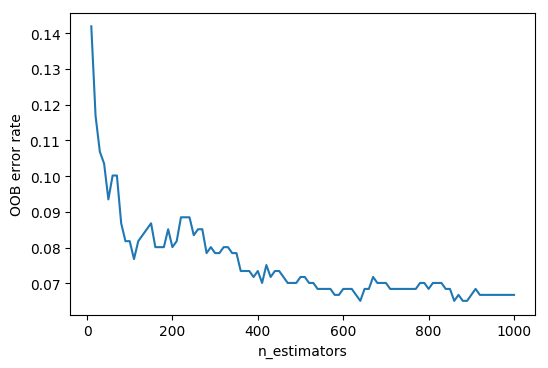

In [5]:
fig = plt.figure(dpi=100)
ax = plt.gca()
ax.plot(np.arange(10,1010,10), 1 - np.array(OOBs))
plt.xlabel('n_estimators')
plt.ylabel('OOB error rate')
plt.show()

In [6]:
for i in range(len(OOBs)):
    diff = OOBs[i] - OOBs[-1]
    if abs(OOBs[i] - OOBs[-1]) / OOBs[-1] < 0.01:
        print("Tree Number:", end=" ")
        print(np.arange(10,1010,10)[i])
        break

Tree Number: 360


In [7]:
rf = RandomForestClassifier(n_estimators=360,warm_start=True, oob_score=True, random_state=1)
rf.fit(train_X, train_y)
print("Error rate in test data:", end=" ")
print("%.3f" % (1 - rf.score(test_X, test_y)))

Error rate in test data: 0.045


### Feature Impotance

In [13]:
feature_importances = pandas.DataFrame([train_X.columns, rf.feature_importances_])
feature_importances.transpose().sort_values(by=[1], ascending=False)

,0,1
7,X8,0.293219
1,X2,0.252879
5,X6,0.0385086
11,X12,0.0238036
20,X21,0.0228103
10,X11,0.0220677
8,X9,0.0204976
2,X3,0.0204894
21,X22,0.0204029
15,X16,0.0201719
